# What is Linear regression?

Linear regression is a common Statistical Data Analysis technique.  
It is used to determine the extent to which there is a linear relationship between a dependent variable 
and one or more independent variables. There are two types of linear regression, simple linear regression 
and multiple linear regression.

In simple linear regression a single independent variable is used to predict the value of a dependent variable. 
In multiple linear regression two or more independent variables are used to predict the value of a dependent variable. 
The difference between the two is the number of independent variables. In both cases there is only a single dependent variable.

Linear Regression - Data Considerations
The dependent variable must be measured on a continuous measurement scale (e.g. 0-100 test score) and 
the independent variable(s) can be measured on either a categorical (e.g. male versus female) or continuous measurement scale.
There are several other assumptions that the data must satisfy in order to qualify for linear regression.

# Multiple Linear Regression Example

Suppose you have a data set consisting of the gender, height and age of children between 5 and 10 years old. 
You could use multiple linear regression to predict the height of a child (dependent variable) 
using both age and gender as predictors (i.e., two independent variables)

# What is Multiple linear regression?

Multiple linear regression attempts to model the relationship between two or more explanatory/indipendant variables.
Every value of the independent variable x is associated with a value of the dependent variable y.

# Describe Multiple linear regression

Multiple Linear Regression attempts to model the Relationship between two or more features and a response by fitting a 
linear equation to observed data. The steps to perform multiple linear Regression are almost similar to that of simple 
linear Regression. The Difference Lies in the Evalution. We can use it to find out which factor has the highest impact 
on the predicted output and now different variable relate to each other.

Here : Y= b0 + b1*x1 + b2*x2 + b3*x3 +…… bn*xn 
Y = Dependent variable and x1, x2, x3, …… xn = multiple independent variables

Assumption of Regression Model :

Linearity: The relationship between dependent and independent variables should be linear.
Homoscedasticity: Constant variance of the errors should be maintained.
Multivariate normality: Multiple Regression assumes that the residuals are normally distributed.
Lack of Multicollinearity: It is assumed that there is little or no multicollinearity in the data.
    
Dummy Variable – 
As we Know in the Multiple Regression Model we use a lot of categorical data. Using Categorical Data is a good method to 
include non-numeric data into respective Regression Model. Categorical Data refers to data values which represent 
categories-data values with fixed and unordered number of values, for instance, gender(male/female). 
In the regression model, these values can be represented by Dummy Variables.

These variable consist of values such as 0 or 1 representing the presence and absence of categorical value.
Dummy Variable Trap –
The Dummy Variable Trap is a condition in which two or more are Highly Correlated. In the simple term, we can say that 
one variable can be predicted from the prediction of the other. The solution of the Dummy Variable Trap is to drop 
one the categorical variable. So if there are m Dummy variables then m-1 variables are used in the model.

# Method of Building Models :

**Backward-Elimination
**Forward Selection
**Bidirectional Elimination
**Score Comparison
* Backward-Elimination :
Step #1 : Select a significant level to start in the model.
Step #2 : Fit the full model with all possible predictor.
Step #3 : Consider the predictor with highest P-value. If P > SL go to STEP 4, otherwise model is Ready.
Step #4 : Remove the predictor.
Step #5 : Fit the model without this variable.

* Forward-Selection :
Step #1 : Select a significance level to enter the model(e.g. SL = 0.05)
Step #2 : Fit all simple regression models y~ x(n). Select the one with the lowest P-value .
Step #3 : Keep this variable and fit all possible models with one extra predictor added to the one(s) you already have.
Step #4 : Consider the predictor with lowest P-value. If P < SL, go to Step #3, otherwise model is Ready.

# Steps Involved in any Multiple Linear Regression Model

Step #1: Data Pre Processing
    a) Importing The Libraries.
    b) Importing the Data Set.
    c) Encoding the Categorical Data.
    d) Avoiding the Dummy Variable Trap.
    e) Splitting the Data set into Training Set and Test Set.

Step #2: Fitting Multiple Linear Regression to the Training set

Step #3: Predicting the Test set results.

# In the below example we have using columns called Gender, height and weight.
# Using two indipendent variables Gender and height, we are going predent the dependent variable Weight (i.e. Y)

In [12]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import pickle

# Importing the dataset
dataset = pd.read_csv('C:\\Users\\insbattula\\Downloads\\SampleData\\weight-height.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values

In [13]:
# read data into a DataFrame
dataset.head()

,Gender,Weight,Height
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
# describe the dataset
dataset.describe()

,Weight,Height
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


In [17]:
# read data into a DataFrame
dataset.shape

(10000, 3)

# What are the features?
Gender: Male or Female
Weight: Weight of the person
Height : Height of the person

Based on the indipendent variables gender & Weight, we are going to predect the dependent variable i.e. Height of the person

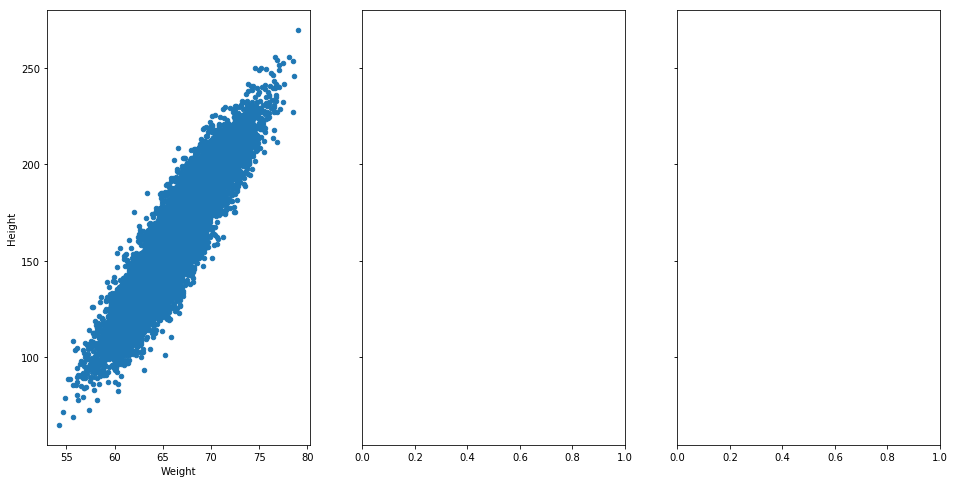

In [35]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
dataset.plot(kind='scatter', x='Weight', y='Height', ax=axs[0], figsize=(16, 8))
#dataset.plot(kind='scatter', x='Gender', y='Height', ax=axs[1])

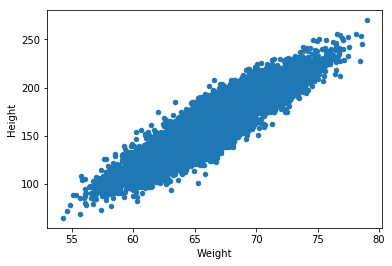

In [37]:
# second way to show relation between weight & height using scattered plot
dataset.plot(kind='scatter',x='Weight', y='Height')

In [39]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

C:\Users\insbattula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\insbattula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [41]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [44]:
# Splitting the dataset into the Training set and Test set
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 100000)

In [46]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

#y_pred = regressor.predict(X_test)
r2_score(y_test,y_pred)

0.8905415987225335

ValueError: Expected 2D array, got 1D array instead:
array=[70.85092011 68.14562101 65.002512   ... 67.19618761 64.64085695
 62.69468206].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

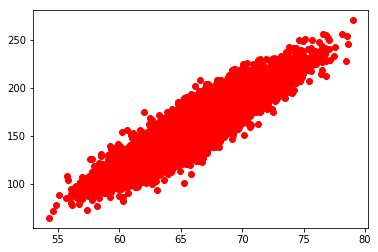

In [51]:
# Visualising the Training set results
plt.scatter(X_train[:,1], y_train, color = 'red')
plt.plot(X_train[:,1], regressor.predict(X_train[:,1]), color = 'blue')
plt.title('Height vs Weight (Training set)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

# Conclusion:
We have created model for the multi linear regression model and  got accuracy of 89%
the relation between height and Weight is quite linear based on the above scattered graph.
We should follow the backward elimination to check the which columns are influenced based on the p-value and also we need to check the R-suare & Adjusted R-Suare values based on the elemenated columns.

# Example -2 (Data which which got is for share of the state by using other columns data whcih i got in the google)

In [16]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import pickle

# Importing the dataset
dataset = pd.read_excel('C:\\Users\\insbattula\\Downloads\\SampleData\\multi.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 5].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 4] = labelencoder.fit_transform(X[:, 4])
onehotencoder = OneHotEncoder(categorical_features = [4])
X = onehotencoder.fit_transform(X).toarray()

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

#y_pred = regressor.predict(X_test)
r2_score(y_test,y_pred)

C:\Users\insbattula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\insbattula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


0.4547576301343479

# Building the optimal model using Backward Elimination

In [9]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((45, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     10.08
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           9.74e-06
Time:                        17:40:11   Log-Likelihood:                 76.704
No. Observations:                  45   AIC:                            -143.4
Df Residuals:                      40   BIC:                            -134.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1245      0.017      7.189      0.000       0.090       0.160
x1             0.1245      0.017      7.189      0.000       0.090       0.160
x2             0.1245      0.017      7.189      0.000       0.090       0.160
x3             0.0058      0.019      0.309      0.759      -0.032       0.044
x4            -0.0294      0.021     -1.376      0.176      -0.073       0.014
x5            -1.3498      0.287     -4.701      0.000      -1.930      -0.769
x6             0.7764      0.323      2.407      0.021       0.124       1.428
==============================================================================
Omnibus:                        1.727   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                0.872
Skew:                           0.023   Prob(JB):                        0.647
Kurtosis:                       3.680   Cond. No.                     3.50e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Based on the above summary we having the more p value for the X3, X4 and X6. We ll remove these columns one by and check the accuracy of the model how it will impact

In [12]:
X_opt = X[:, [0, 1, 2, 4, 5, 6]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     13.71
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           2.46e-06
Time:                        17:43:54   Log-Likelihood:                 76.650
No. Observations:                  45   AIC:                            -145.3
Df Residuals:                      41   BIC:                            -138.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1248      0.017      7.294      0.000       0.090       0.159
x1             0.1248      0.017      7.294      0.000       0.090       0.159
x2             0.1248      0.017      7.294      0.000       0.090       0.159
x3            -0.0333      0.017     -1.973      0.055      -0.067       0.001
x4            -1.3594      0.282     -4.816      0.000      -1.929      -0.789
x5             0.8107      0.299      2.707      0.010       0.206       1.415
==============================================================================
Omnibus:                        1.645   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                0.797
Skew:                           0.033   Prob(JB):                        0.671
Kurtosis:                       3.649   Cond. No.                     9.91e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
X_opt = X[:, [0, 1, 2, 5, 6]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     17.41
Date:                Thu, 01 Aug 2019   Prob (F-statistic):           3.11e-06
Time:                        17:44:32   Log-Likelihood:                 74.609
No. Observations:                  45   AIC:                            -143.2
Df Residuals:                      42   BIC:                            -137.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1341      0.017      7.885      0.000       0.100       0.168
x1             0.1341      0.017      7.885      0.000       0.100       0.168
x2             0.1341      0.017      7.885      0.000       0.100       0.168
x3            -1.4329      0.289     -4.954      0.000      -2.017      -0.849
x4             0.6889      0.303      2.274      0.028       0.077       1.300
==============================================================================
Omnibus:                        3.773   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                3.616
Skew:                           0.018   Prob(JB):                        0.164
Kurtosis:                       4.388   Cond. No.                     1.01e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Conclusion - Based the above model we could get 45 % of accuracy and We need check the collinearity and other factor to improve the accuracy.
# when we try to delete the columns accuracy going low. Hence we not going to delete any columns as it is impacting the accuracy.
# Need to work on this to improve the accuracy